In [2]:
# Importando a biblioteca
import pandas as pd

In [4]:
# Leitura dos arquivos
df1 = pd.read_excel("/content/drive/MyDrive/datasets/Aracaju.xlsx")
df2 = pd.read_excel("/content/drive/MyDrive/datasets/Fortaleza.xlsx")
df3 = pd.read_excel("/content/drive/MyDrive/datasets/Natal.xlsx")
df4 = pd.read_excel("/content/drive/MyDrive/datasets/Recife.xlsx")
df5 = pd.read_excel("/content/drive/MyDrive/datasets/Salvador.xlsx")

In [6]:
# Juntando todos os arquivos
df = pd.concat([df1,df2,df3,df4,df5])

In [7]:
df.head()

,Cidade,Data,Vendas,LojaID,Qtde
0,Aracaju,2018-01-01,142.00,1520,1
1,Aracaju,2018-01-01,14.21,1522,6
2,Aracaju,2018-01-01,71.55,1520,1
3,Aracaju,2018-01-01,3.01,1521,7
4,Aracaju,2018-01-01,24.51,1522,8


In [9]:
df.tail()

,Cidade,Data,Vendas,LojaID,Qtde
235,Salvador,2019-01-03,41.84,1034,1
236,Salvador,2019-01-03,126.29,1035,3
237,Salvador,2019-01-03,38.06,1036,3
238,Salvador,2019-01-03,139.64,1035,1
239,Salvador,2019-01-03,161.41,1037,3


In [10]:
df.dtypes

Cidade            object
Data      datetime64[ns]
Vendas           float64
LojaID             int64
Qtde               int64
dtype: object

In [13]:
# pegar uma amostra dos dados
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde
164,Salvador,2019-01-02,6.59,1035,1
151,Natal,2019-01-02,14.63,1035,1
31,Aracaju,2018-01-01,171.16,1520,9
205,Salvador,2019-01-02,196.09,1037,1
186,Natal,2019-01-02,169.09,1036,2


In [14]:
# Alterando o tipo de dado da coluna LojaID
df['LojaID'] = df["LojaID"].astype("object")

In [15]:
df.dtypes

Cidade            object
Data      datetime64[ns]
Vendas           float64
LojaID            object
Qtde               int64
dtype: object

In [16]:
# Consultando linhas com valores faltantes
df.isnull().sum()

Cidade    0
Data      0
Vendas    0
LojaID    0
Qtde      0
dtype: int64

In [18]:
# Substituindo os valores nulos pela média
df["Vendas"].fillna(df["Vendas"].mean(), inplace=True)

In [19]:
df.isnull().sum()

Cidade    0
Data      0
Vendas    0
LojaID    0
Qtde      0
dtype: int64

In [20]:
# Substituindo os valores nulos por zero
df["Vendas"].fillna(0, inplace=True)

In [ ]:
# Apagando linhas com valores nulos
df.dropna(inplace=True)

In [ ]:
# apagando as linhas com valores nulos com base apenas em uma coluna
df.dropna(subset=["Vendas"], inplace=True)

## **Criando colunas novas**

In [21]:
# Criando a coluna de receita multiplicando os valores de duas colunas vendas * Qtde
df["Receita"] = df["Vendas"].mul(df["Qtde"])

In [22]:
df.head()

,Cidade,Data,Vendas,LojaID,Qtde,Receita
0,Aracaju,2018-01-01,142.00,1520,1,142.00
1,Aracaju,2018-01-01,14.21,1522,6,85.26
2,Aracaju,2018-01-01,71.55,1520,1,71.55
3,Aracaju,2018-01-01,3.01,1521,7,21.07
4,Aracaju,2018-01-01,24.51,1522,8,196.08


In [23]:
# Criando coluna de Receita/Vendas
df["Receita/Vendas"] = df["Receita"] / df["Vendas"]

In [24]:
df.head()

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas
0,Aracaju,2018-01-01,142.00,1520,1,142.00,1.0
1,Aracaju,2018-01-01,14.21,1522,6,85.26,6.0
2,Aracaju,2018-01-01,71.55,1520,1,71.55,1.0
3,Aracaju,2018-01-01,3.01,1521,7,21.07,7.0
4,Aracaju,2018-01-01,24.51,1522,8,196.08,8.0


In [25]:
# Retornando a maior receita
df["Receita"].max()

3544.0

In [26]:
# Retornando a menor receita
df["Receita"].min()

3.34

In [27]:
# Retornando as linhas com as 3 maiores receitas
df.nlargest(3, "Receita")

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas
7,Natal,2019-03-18,886.0,853,4,3544.0,4.0
51,Natal,2018-01-21,859.0,852,4,3436.0,4.0
55,Natal,2019-01-08,859.0,854,4,3436.0,4.0


In [28]:
# Retornando as linhas com as 3 menores receitas
df.nsmallest(3, "Receita")

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas
118,Aracaju,2018-01-01,3.34,1522,1,3.34,1.0
65,Recife,2019-01-01,4.01,981,1,4.01,1.0
92,Natal,2019-01-02,4.57,1035,1,4.57,1.0


In [29]:
# Agrupamento por cidade
df.groupby("Cidade")["Receita"].sum()

Cidade
Aracaju       48748.25
Fortaleza     37913.97
Natal        167227.52
Recife        51936.51
Salvador      40596.73
Name: Receita, dtype: float64

In [32]:
# Ordenando o conjunto de dados
df.sort_values("Receita", ascending=False).head(10)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas
7,Natal,2019-03-18,886.0,853,4,3544.0,4.0
55,Natal,2019-01-08,859.0,854,4,3436.0,4.0
51,Natal,2018-01-21,859.0,852,4,3436.0,4.0
30,Natal,2018-10-02,856.0,853,4,3424.0,4.0
41,Natal,2018-05-20,835.0,852,4,3340.0,4.0
38,Natal,2018-02-25,828.0,852,4,3312.0,4.0
10,Natal,2018-10-27,828.0,852,4,3312.0,4.0
69,Natal,2019-03-24,817.0,852,4,3268.0,4.0
62,Natal,2018-02-10,793.0,854,4,3172.0,4.0
52,Natal,2018-04-27,778.0,854,4,3112.0,4.0


### **Trabalhando com datas**

In [34]:
# Transformando a coluna de data em tipo inteiro
df["Data"] = df["Data"].astype("int64")

In [36]:
df.dtypes

Cidade             object
Data                int64
Vendas            float64
LojaID             object
Qtde                int64
Receita           float64
Receita/Vendas    float64
dtype: object

In [37]:
# Transformando coluna de data que está como int64 em datetime
df["Data"] = pd.to_datetime(df["Data"])

In [38]:
df.dtypes

Cidade                    object
Data              datetime64[ns]
Vendas                   float64
LojaID                    object
Qtde                       int64
Receita                  float64
Receita/Vendas           float64
dtype: object

In [39]:
# Agrupamento por ano
df.groupby(df["Data"].dt.year)["Receita"].sum()

Data
2018    118176.53
2019    228246.45
Name: Receita, dtype: float64

In [40]:
# Criando uma nova coluna com ano
df["Ano_Venda"] = df["Data"].dt.year

In [42]:
df.sample(10)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas,Ano_Venda
125,Fortaleza,2019-03-02,37.60,983,4,150.40,4.0,2019
91,Salvador,2019-01-01,17.74,1035,1,17.74,1.0,2019
121,Salvador,2019-03-02,100.70,1037,3,302.10,3.0,2019
105,Salvador,2019-01-01,32.83,1037,1,32.83,1.0,2019
93,Salvador,2019-01-01,15.58,1037,1,15.58,1.0,2019
114,Fortaleza,2019-03-02,16.82,983,4,67.28,4.0,2019
16,Fortaleza,2019-01-01,97.32,1002,5,486.60,5.0,2019
100,Natal,2019-01-02,190.97,1036,2,381.94,2.0,2019
17,Aracaju,2018-01-01,162.19,1522,9,1459.71,9.0,2018
233,Natal,2019-01-03,172.40,1036,2,344.80,2.0,2019


In [44]:
# Extraindo o mes e o dia
df["mes_venda"], df["dia_venda"] = (df["Data"].dt.month, df["Data"].dt.day)

In [46]:
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas,Ano_Venda,mes_venda,dia_venda
58,Fortaleza,2019-01-01,38.90,1004,4,155.60,4.0,2019,1,1
141,Salvador,2019-03-02,9.08,1036,1,9.08,1.0,2019,3,2
1,Recife,2019-01-01,11.44,983,1,11.44,1.0,2019,1,1
102,Aracaju,2018-01-01,7.29,1523,1,7.29,1.0,2018,1,1
148,Salvador,2019-01-02,40.59,1037,3,121.77,3.0,2019,1,2


In [48]:
# Retornando a data mais antiga
df["Data"].min()

Timestamp('2018-01-01 00:00:00')

In [49]:
# Calculando diferença de dias
df["diferenca_dias"] = df["Data"] - df["Data"].min()

In [52]:
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas,Ano_Venda,mes_venda,dia_venda,diferenca_dias
35,Recife,2019-01-01,148.90,983,1,148.90,1.0,2019,1,1,365 days
34,Salvador,2019-01-01,36.54,1037,3,109.62,3.0,2019,1,1,365 days
112,Aracaju,2018-01-01,4.52,1522,8,36.16,8.0,2018,1,1,0 days
8,Fortaleza,2019-02-11,37.49,1005,1,37.49,1.0,2019,2,11,406 days
58,Natal,2018-12-23,272.00,853,3,816.00,3.0,2018,12,23,356 days


In [53]:
# Criando a coluna do trimestre
df["trimestre_venda"] = df["Data"].dt.quarter

In [57]:
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas,Ano_Venda,mes_venda,dia_venda,diferenca_dias,trimestre_venda
45,Recife,2019-01-01,15.90,983,8,127.20,8.0,2019,1,1,365 days,1
74,Aracaju,2018-01-01,7.86,1520,2,15.72,2.0,2018,1,1,0 days,1
225,Salvador,2019-01-02,36.23,1035,1,36.23,1.0,2019,1,2,366 days,1
89,Natal,2019-01-02,17.46,1034,1,17.46,1.0,2019,1,2,366 days,1
17,Natal,2018-02-18,276.00,854,3,828.00,3.0,2018,2,18,48 days,1


In [58]:
# Filtrando as vendas de 2019 do mes de março
vendas_marco_19 = df.loc[(df["Data"].dt.year == 2019) & (df["Data"].dt.month == 3)]

In [59]:
vendas_marco_19

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas,Ano_Venda,mes_venda,dia_venda,diferenca_dias,trimestre_venda
108,Fortaleza,2019-03-02,152.89,981,4,611.56,4.0,2019,3,2,425 days,1
109,Fortaleza,2019-03-02,18.90,982,6,113.40,6.0,2019,3,2,425 days,1
110,Fortaleza,2019-03-02,51.98,983,6,311.88,6.0,2019,3,2,425 days,1
111,Fortaleza,2019-03-02,8.00,981,3,24.00,3.0,2019,3,2,425 days,1
112,Fortaleza,2019-03-02,133.59,982,1,133.59,1.0,2019,3,2,425 days,1
...,...,...,...,...,...,...,...,...,...,...,...,...
137,Salvador,2019-03-02,51.66,1036,3,154.98,3.0,2019,3,2,425 days,1
138,Salvador,2019-03-02,212.03,1037,3,636.09,3.0,2019,3,2,425 days,1
139,Salvador,2019-03-02,169.01,1036,1,169.01,1.0,2019,3,2,425 days,1
140,Salvador,2019-03-02,20.79,1036,2,41.58,2.0,2019,3,2,425 days,1


In [61]:
vendas_marco_19.sample(20)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas,Ano_Venda,mes_venda,dia_venda,diferenca_dias,trimestre_venda
140,Fortaleza,2019-03-02,166.89,983,5,834.45,5.0,2019,3,2,425 days,1
121,Salvador,2019-03-02,100.70,1037,3,302.10,3.0,2019,3,2,425 days,1
134,Recife,2019-03-02,195.18,980,5,975.90,5.0,2019,3,2,425 days,1
125,Fortaleza,2019-03-02,37.60,983,4,150.40,4.0,2019,3,2,425 days,1
131,Recife,2019-03-02,139.07,982,6,834.42,6.0,2019,3,2,425 days,1
119,Fortaleza,2019-03-02,152.30,982,7,1066.10,7.0,2019,3,2,425 days,1
126,Salvador,2019-03-02,41.69,1036,2,83.38,2.0,2019,3,2,425 days,1
137,Fortaleza,2019-03-02,51.99,983,3,155.97,3.0,2019,3,2,425 days,1
113,Recife,2019-03-02,38.63,980,2,77.26,2.0,2019,3,2,425 days,1
134,Salvador,2019-03-02,125.90,1036,1,125.90,1.0,2019,3,2,425 days,1


### **Visualização de dados**

In [62]:
# Verificando quantas linhas cada loja tem
df["LojaID"].value_counts(ascending=False)

1036    117
1035    112
1037    101
1034     67
983      65
982      44
1522     41
1520     39
980      36
981      31
1002     30
1005     30
852      29
1523     29
1004     28
854      28
853      26
1521     21
1003     20
Name: LojaID, dtype: int64

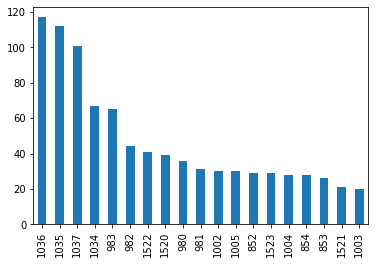

In [63]:
# Gerando um grafico com as informações acima
df["LojaID"].value_counts(ascending=False).plot.bar()

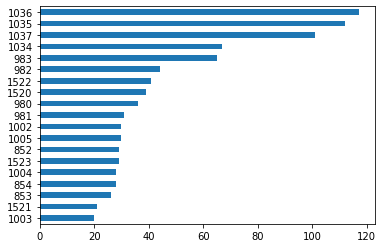

In [67]:
# Grafico de barras horizontal
df["LojaID"].value_counts(ascending=True).plot.barh();

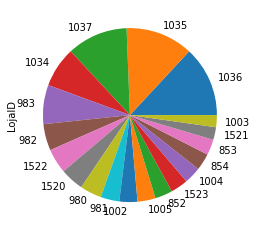

In [65]:
# Gerando um grafico de pizza
df["LojaID"].value_counts(ascending=False).plot.pie()

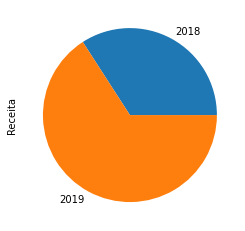

In [68]:
# Criando um grafico de pizza a partir de um group by
df.groupby(df["Data"].dt.year)["Receita"].sum().plot.pie()

In [69]:
# Toal de vendas por cidade
df["Cidade"].value_counts()

Natal        240
Salvador     240
Fortaleza    142
Recife       142
Aracaju      130
Name: Cidade, dtype: int64

Text(0, 0.5, 'Total Vendas')

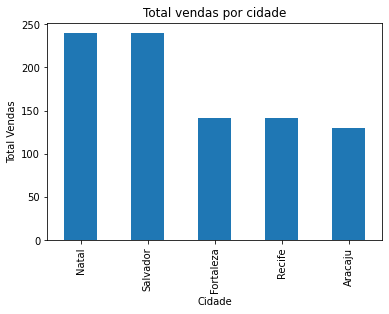

In [70]:
# Adicionando um titulo e alterando o nome dos eixos
import matplotlib.pyplot as plt
df["Cidade"].value_counts().plot.bar(title="Total vendas por cidade")
plt.xlabel("Cidade")
plt.ylabel("Total Vendas")

Text(0, 0.5, 'Total Vendas')

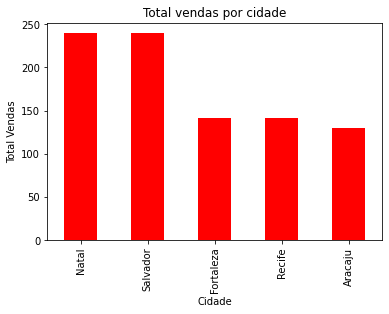

In [71]:
# Adicionando um titulo e alterando o nome dos eixos e trocando a cor da barra
import matplotlib.pyplot as plt
df["Cidade"].value_counts().plot.bar(title="Total vendas por cidade", color="red")
plt.xlabel("Cidade")
plt.ylabel("Total Vendas")

In [72]:
# Alterando o estilo
plt.style.use("ggplot")

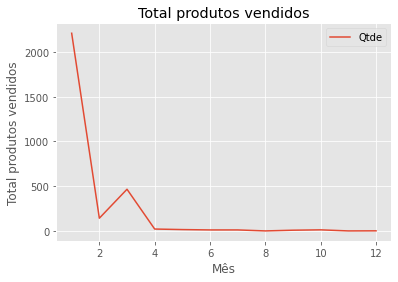

In [75]:
df.groupby(df["mes_venda"])["Qtde"].sum().plot(title = "Total produtos vendidos")
plt.xlabel("Mês")
plt.ylabel("Total produtos vendidos")
plt.legend();

In [76]:
df.groupby(df["mes_venda"])["Qtde"].sum()

mes_venda
1     2208
2      144
3      467
4       23
5       17
6       13
7       13
8        2
9       10
10      14
11       2
12       3
Name: Qtde, dtype: int64

In [78]:
# Selecionando apenas as vendas do ano de 2019
df_2019 = df[df["Ano_Venda"] == 2019]

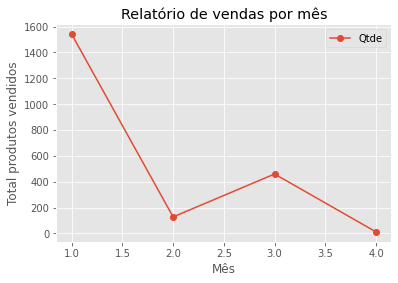

In [81]:
df_2019.groupby(df_2019["mes_venda"])["Qtde"].sum().plot(marker = "o", title = "Relatório de vendas por mês")
plt.xlabel("Mês")
plt.ylabel("Total produtos vendidos")
plt.legend();

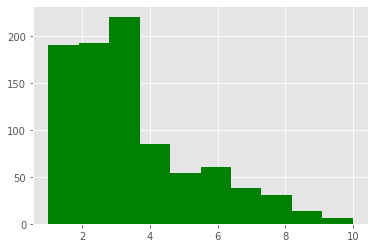

In [85]:
# Histograma
plt.hist(df["Qtde"], color = "Green");

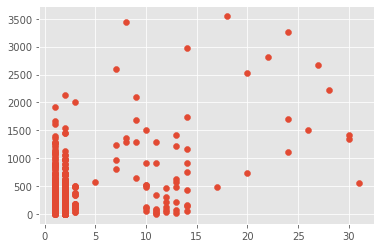

In [86]:
# Grafico de dispersão
plt.scatter(x = df_2019["dia_venda"], y = df_2019["Receita"]);

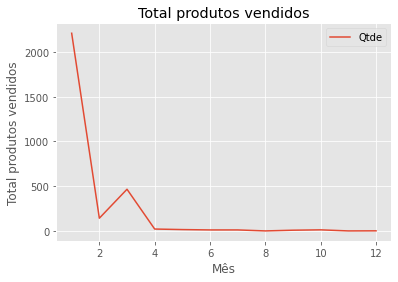

In [87]:
# Salvando a imagem do grafico
df.groupby(df["mes_venda"])["Qtde"].sum().plot(title = "Total produtos vendidos")
plt.xlabel("Mês")
plt.ylabel("Total produtos vendidos")
plt.legend();
plt.savefig("Salvando grafico total produtos vendidos.png")